In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score

In [2]:
iris = load_iris()
dt_clf = DecisionTreeClassifier()
train_data = iris.data
train_label = iris.target
dt_clf.fit(train_data, train_label)
pred = dt_clf.predict(train_data)

In [2]:
print("예측 정확도 :" , accuracy_score(train_label, pred))

예측 정확도 : 1.0


In [3]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

dt_clf = DecisionTreeClassifier()
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.1)

clf = dt_clf.fit(X_train, y_train)
pred = clf.predict(X_test)

In [4]:
print("예측 정확도 : {0:.4f}".format(accuracy_score(y_test, pred)))

예측 정확도 : 1.0000


In [5]:
import pickle

with open('decision_tree_classifier.pkl', 'wb') as fid:
    pickle.dump(clf, fid)

In [6]:
with open('decision_tree_classifier.pkl', 'rb') as fid:
    clf = pickle.load(fid)

[Text(167.4, 199.32, 'X[2] <= 2.45\ngini = 0.665\nsamples = 135\nvalue = [44, 49, 42]'),
 Text(141.64615384615385, 163.07999999999998, 'gini = 0.0\nsamples = 44\nvalue = [44, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.497\nsamples = 91\nvalue = [0, 49, 42]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.171\nsamples = 53\nvalue = [0, 48, 5]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\ngini = 0.042\nsamples = 47\nvalue = [0, 46, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'gini = 0.0\nsamples = 46\nvalue = [0, 46, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 54.359999999999985, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(154.523

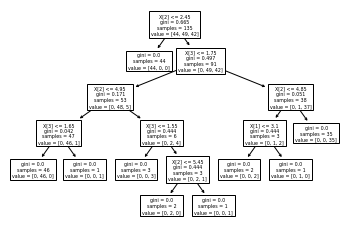

In [7]:
plot_tree(clf)

In [21]:
import glob
import pandas as pd

In [21]:
paths = glob.glob('/Users/choisj2/data/da-datalake-prod/ml-mart/rds/product/year=2021/month=06/day=15/*')

In [23]:
df = pd.concat([pd.read_parquet(path=path) for path in paths[:2]])

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 960343 entries, 0 to 480252
Data columns (total 74 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   C_BUNDLE_PRDUCT_NO          960343 non-null  object        
 1   C_BUNDLE_PRDUCT_YN          960343 non-null  object        
 2   C_PRDUCT_NO                 960343 non-null  object        
 3   C_PRDUCT_NAME               960343 non-null  object        
 4   C_PRDUCT_EN_NAME            960332 non-null  object        
 5   C_PRDUCT_OPTION_NAME        960343 non-null  object        
 6   C_PRDUCT_SKU                960343 non-null  object        
 7   C_PRDUCT_ONSLF_SKU          173423 non-null  object        
 8   C_PRDUCT_INVNTRY            960343 non-null  int32         
 9   C_PRDUCT_NORMAL_INVNTRY_YN  960343 non-null  object        
 10  C_PRDUCT_TODAY_INVNTRY_YN   960343 non-null  object        
 11  C_PRDUCT_DLVY_CD            960343 non-

In [26]:
df = df[['C_PRDUCT_NO', 'C_PRDUCT_NAME', 'C_PRDUCT_DSCNT_PC', 'C_PRDUCT_SELL_PC', 'TAG_NO', 'C_CTGRY_NO_THIRD']]

In [28]:
df = df.dropna()

In [31]:
df.['C_CTGRY_NO_THIRD'].astype('int64')

In [32]:
df.head(5)

,C_PRDUCT_NO,C_PRDUCT_NAME,C_PRDUCT_DSCNT_PC,C_PRDUCT_SELL_PC,TAG_NO,C_CTGRY_NO_THIRD
1,81,VENNIS 니트,91000,91000,"10,11,12,14,15,16,17,13",17.0
2,288,MUMU 체크 테니스 스커트,15750,17500,"10,11,12,14,15,16,17,13",48.0
13,1421,KOE 데님 스커트,32000,32000,"10,11,12,13,14,15,16,17",48.0
16,1568,Aila linen skirt,22000,22000,"13,14,15,16,17,10,11,12",48.0
20,1782,Koe button denim skirt,32000,32000,"10,11,12,13,14,15,16,17",48.0
